# __Mini Projet Apprentissage Artificiel__ 

We start by importing all the modules we will use in this notebook.
We will use __sklearn__ as our main framework for ML.

In [22]:
import numpy as np
import pandas as pd 
import scipy.io
import sklearn
from matplotlib import pyplot as plt
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

We then load our data and vizualize it.

In [9]:
# path = "./Projet_Expression.zip"
# urlretrieve("https://moodle.psl.eu/pluginfile.php/614743/mod_resource/content/14/Projet_Expression.zip",path)
# with zipfile.ZipFile(path,'r') as zip_ref:
#     zip_ref.extractall("./Projet_Expression")

data_matrix = scipy.io.loadmat("./gliome.mat")
X = data_matrix['X']
y = data_matrix['Y'][:, 0] 

print(f"The data has the dimension : \n • Input size : {X.shape} \n • Output size : {y.shape}")

The data has the dimension : 
 • Input size : (50, 4434) 
 • Output size : (50,)


In [10]:
df = pd.DataFrame(X)
df['y'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4425,4426,4427,4428,4429,4430,4431,4432,4433,y
0,1.877947,1.301030,1.950365,2.765147,2.383456,1.935003,1.805501,1.489958,1.949878,1.984977,...,3.593485,1.686636,1.301030,1.309630,2.062958,1.332438,2.113275,2.609381,3.687966,1
1,2.651036,2.290211,2.436589,2.427530,2.818690,2.228490,2.174424,2.106459,2.091490,2.137432,...,3.498401,2.493015,1.766260,1.869179,2.238474,1.301030,1.929475,2.519645,3.951704,1
2,2.221108,2.302321,3.045137,2.438125,2.462685,1.971209,2.288998,1.436299,2.041398,2.232764,...,3.586848,2.300823,1.886583,1.806535,1.301030,1.861657,1.301030,1.301030,3.705766,1
3,2.168830,2.125105,2.993723,2.253585,2.675738,2.120541,2.464906,1.484127,1.978128,2.364278,...,3.498593,2.439544,1.881537,1.934864,1.301030,1.301030,1.301030,1.838071,3.826369,1
4,2.575785,1.705988,2.513637,2.906606,2.578367,2.200210,2.367455,1.959123,1.897500,1.956192,...,3.437832,2.224660,1.593090,1.761575,1.301030,1.602045,1.410159,1.847608,4.082294,1


This problem is a supervised classification problem. 
We will try 2 different models to classify our data into 4 differents classes (gliome types)

First we need to split our data into 3 sets : Train, Validation, Test
In order to compare performances on different training set, we will generate 2 triplets of sets.

In [13]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3,random_state=84, stratify=y)
# X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X_temp_1, y_temp_1, test_size= 0.3)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3,random_state=16, stratify=y)
# X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_temp_1, y_temp_1, test_size= 0.3)

Text(0.5, 0, 'Train Labels 2')

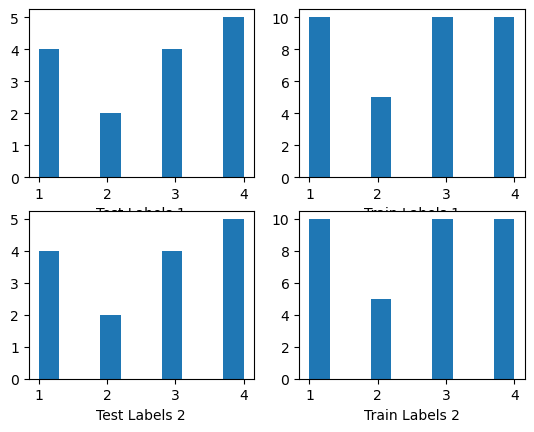

In [14]:
plt.subplot(2, 2, 1)
plt.hist(y_test_1)
plt.xlabel('Test Labels 1')
plt.subplot(2, 2, 2)
plt.hist(y_train_1)
plt.xlabel('Train Labels 1')
plt.subplot(2, 2, 3)
plt.hist(y_test_2)
plt.xlabel('Test Labels 2')
plt.subplot(2, 2, 4)
plt.hist(y_train_2)
plt.xlabel('Train Labels 2')


### Random Forest Decision Tree Classifier (RFD)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                  min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=1e-07, class_weight=None)

In [46]:
print("RESULTS ON FIRST SET TRAIN/TEST")
print(clf)
clf = clf.fit(X_train_1, y_train_1)
score = clf.score(X_test_1, y_test_1)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test_1, clf.predict(X_test_1)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

RESULTS ON FIRST SET TRAIN/TEST
DecisionTreeClassifier(max_depth=5, min_impurity_decrease=1e-07)
Acuracy (on test set) =  0.8666666666666667
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         4
           4       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.93      0.88      0.88        15
weighted avg       0.90      0.87      0.86        15


 CONFUSION MATRIX
[[4 0 0 0]
 [0 2 0 0]
 [0 0 2 2]
 [0 0 0 5]]


In [24]:
print("RESULTS ON SECOND SET TRAIN/TEST")
print(clf)
clf = clf.fit(X_train_2, y_train_2)
score = clf.score(X_test_2, y_test_2)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test_2, clf.predict(X_test_2)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

RESULTS ON SECOND SET TRAIN/TEST
DecisionTreeClassifier(max_depth=5, min_impurity_decrease=1e-07)
Acuracy (on test set) =  0.4
              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           2       1.00      0.50      0.67         2
           3       0.25      0.25      0.25         4
           4       0.20      0.20      0.20         5

    accuracy                           0.40        15
   macro avg       0.51      0.42      0.45        15
weighted avg       0.43      0.40      0.40        15


 CONFUSION MATRIX
[[3 0 0 1]
 [1 1 0 0]
 [0 0 1 3]
 [1 0 3 1]]


In [16]:
from sklearn import model_selection

params = {'criterion' : ['entropy','gini'],
          'splitter' : ['best','random'],
          'max_depth' : np.arange(2,6,1,dtype = int),
          'min_samples_split' : np.arange(1,3,1,dtype = int),
          'min_samples_leaf' : np.arange(1,3,1,dtype = int),
          'min_weight_fraction_leaf' : np.logspace(-2,3,5),
          'min_impurity_decrease' : np.logspace(-10,-3,4)
        }
DTC = tree.DecisionTreeClassifier()
grid_cv = model_selection.GridSearchCV(DTC,param_grid= params,cv = 4,scoring='accuracy')
grid_cv.fit(X_train_1,y_train_1)

c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4096 fits failed out of a total of 5120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2560 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\pierr\miniconda3\Lib\sit

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([2, 3, 4, 5]),
                         'min_impurity_decrease': array([1.00000000e-10, 2.15443469e-08, 4.64158883e-06, 1.00000000e-03]),
                         'min_samples_leaf': array([1, 2]),
                         'min_samples_split': array([1, 2]),
                         'min_weight_fraction_leaf': array([1.00000000e-02, 1.77827941e-01, 3.16227766e+00, 5.62341325e+01,
       1.00000000e+03]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [17]:
best_DTC = grid_cv.best_estimator_
best_params = grid_cv.best_params_
print(best_params)
best_DTC = best_DTC.fit(X_train_1, y_train_1)

# Evaluate acuracy on test data
print(best_DTC)
score = best_DTC.score(X_test_1, y_test_1)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test_1, best_DTC.predict(X_test_1)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

{'criterion': 'entropy', 'max_depth': 2, 'min_impurity_decrease': 2.1544346900318866e-08, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1778279410038923, 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_depth=2,
                       min_impurity_decrease=2.1544346900318866e-08,
                       min_weight_fraction_leaf=0.1778279410038923,
                       splitter='random')
Acuracy (on test set) =  0.6666666666666666
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.33      0.50      0.40         2
           3       0.60      0.75      0.67         4
           4       1.00      0.60      0.75         5

    accuracy                           0.67        15
   macro avg       0.67      0.65      0.64        15
weighted avg       0.74      0.67      0.68        15


 CONFUSION MATRIX
[[3 1 0 0]
 [1 1 0 0]
 [0 1 3 0]
 [0 0 2 3]]
